In [18]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

from IPython.display import Image

### Постановка задачи:

Задача этой работы - понять необходимость масштабирующих функций. Масштабирование данных может оказать значимое влияние на конечный результат.

Так, например, в градиентном бустинге масшабирование может изменить длину проходимого пути для поиска локального минимума.

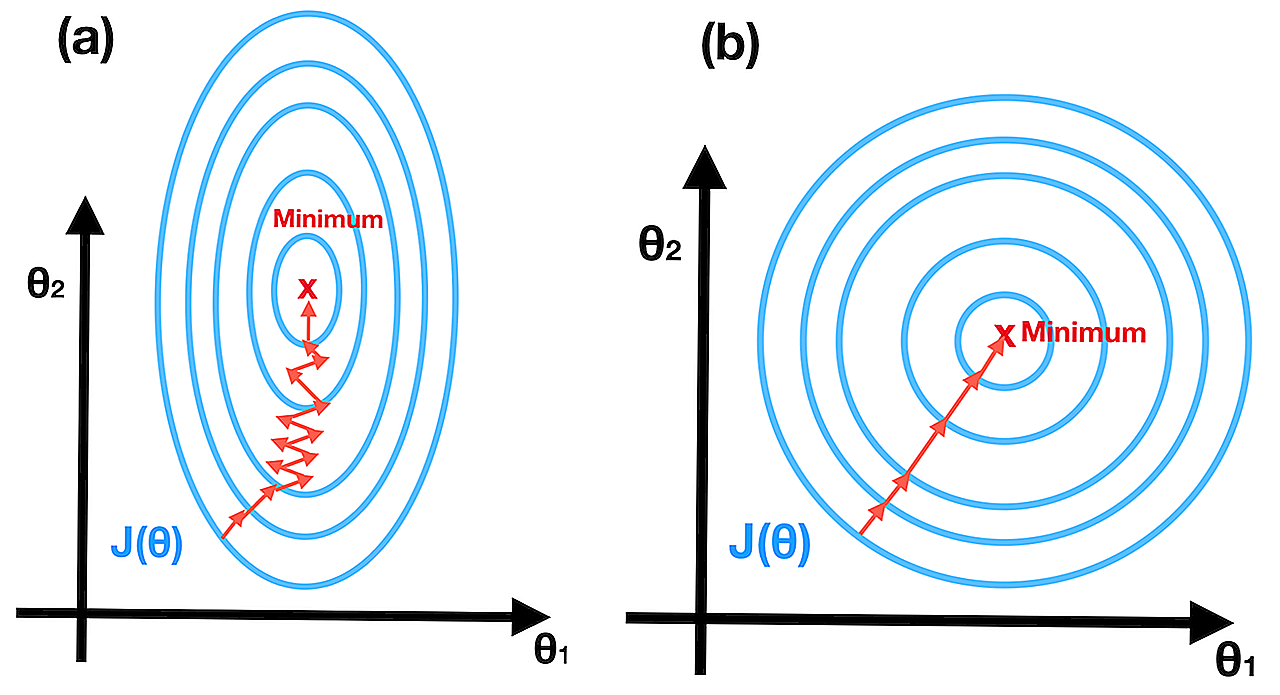

In [111]:
Image("what-does-scaling-a-gradient-do.png", width=700)

In [112]:
# Реализуем Линейную Регрессию самостоятельно, не используя библеотеку sklearn.

class LinearRegression:
    
    def __init__(self, iterations = 10000, learning_rate = 0.1):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.iterations):
            y_pred = self.predict(X)

            dw = (1 / n_samples)*(X.T @ (y_pred - y))
            db = (1 / n_samples)*(y_pred - y).sum()

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        return X @ self.weights + self.bias


In [113]:
data = pd.read_csv('train (2).csv')[['LotArea', 'SalePrice']].dropna()
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [114]:
X_train, X_test, y_train, y_test = train_test_split(data[['LotArea']], data['SalePrice'], test_size=0.3)

Обучим нашу линейную регрессию на не отмасштабированных данных.
В данном случае параметры SalePrice и LotArea очень большие, поэтому нам нужно использовать маленький шаг обучения. По сути это означает, что потребуется очень много итераций для нахождения локального минимума.

In [115]:
model = LinearRegression(iterations=100, learning_rate=0.000000001)
model.fit(X_train, y_train)

In [116]:
mean_squared_log_error(y_test, model.predict(X_test))

0.6347988833741331

Алгоритм машинного обучения работающий с числами не видит разницы между числами, которые обозначают вес (в кг или в граммах), и числами, которые обозначают ценю, например в долларах. Однако разница есть.

Проблема заключается в том, что если первый признак намного больше второго, то алгоритм решает так: поскольку первый признак больше второго, тогда первый признак более важен чем второй.

Мы можем решить данную проблему, сделав все признаки в одном и том же небольшом диапазоне. Существует много способов масштабирования. Будем использовать StandardScaler.

In [117]:
# Реализуем StandardScaler самостоятельно.

class StandardScaler:
    
    def __init__(self):
        self.max_value = None
        self.min_value = None
    
    def fit(self, X):
        self.max_value = X.max()
        self.min_value = X.min()
    
    def transform(self, X):
        return (X - self.min_value) / (self.max_value - self.min_value)
    
    def inverse_transform(self, X):
        return (X * (self.max_value - self.min_value)) + self.min_value

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Теперь обучим нашу модель на отмасштабированных данных.

In [119]:
model = LinearRegression(iterations=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_log_error(y_test, y_pred)

0.16406244205777906

Таким образом, используя масштабирование мы получили результат лучше, чем без использования масштабирования.